# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.510825e+01     1.433703e+01
 * time: 0.0037479400634765625
     1     6.261635e+01     1.059977e+01
 * time: 0.010985851287841797
     2     5.596146e+01     1.475653e+01
 * time: 0.02825188636779785
     3     4.086197e+01     9.911974e+00
 * time: 0.13123297691345215
     4     3.058236e+01     8.450051e+00
 * time: 0.15758395195007324
     5     2.562763e+01     7.538135e+00
 * time: 0.1791839599609375
     6     1.224479e+01     2.494525e+00
 * time: 0.20121097564697266
     7     1.185749e+01     4.313602e+00
 * time: 0.21592402458190918
     8     9.436821e+00     2.333889e+00
 * time: 0.28729701042175293
     9     8.910663e+00     2.473528e+00
 * time: 0.30191898345947266
    10     8.043010e+00     2.030384e+00
 * time: 0.3199429512023926
    11     7.797338e+00     2.700208e+00
 * time: 0.3357889652252197
    12     7.444471e+00     2.128942e+00
 * time: 0.35129785537719727
    13     7.127486e+00     2.012159e+00
 * time:

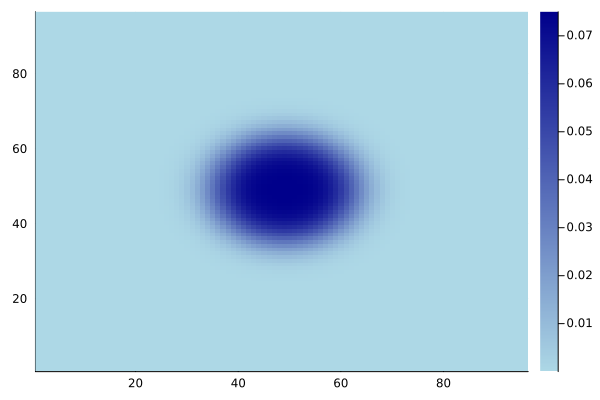

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)